In [1]:
#Sentiment Analysis of Movie Reviews
#Dataset from kaggle https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/overview
# End goal of this project is to train an NLP model, and host on AWS EKS


In [2]:
pip install spacy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 777.1 MB 4.9 kB/s  eta 0:00:01     |███████████▌                    | 280.2 MB 83.7 MB/s eta 0:00:06     |███████████▊                    | 283.7 MB 83.7 MB/s eta 0:00:06     |████████████████████            | 486.7 MB 54.7 MB/s eta 0:00:06     |████████████████████▋           | 501.1 MB 54.7 MB/s eta 0:00:06     |██████████████████████████▌     | 643.9 MB 32.6 MB/s eta 0:00:05
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#NOTE: I had already installed Spacy. If not istalled, use below commands
# pip install spacy
# !python -m spacy download en_core_web_lg <-- downloads this module
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_lg

In [6]:
df = pd.read_csv('Movie_Sentiment_train.tsv', sep='\t')
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


<AxesSubplot:xlabel='Sentiment'>

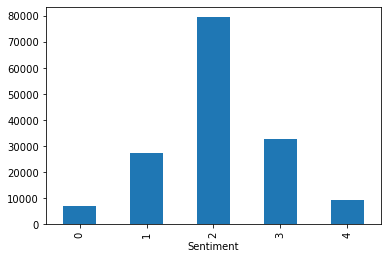

In [8]:
df.groupby("Sentiment").Sentiment.count().plot.bar(ylim=0)

In [9]:
#EDA
#Extract Named Entities, Verbs and Adjectives using Spacy.
# the goal of the below exercise is to see if there are any patterns in the data 
# e.g. do certain types of reviews have more instances of certain people or Adjectives

In [10]:
nlp = en_core_web_lg.load()

In [11]:
person_df = pd.DataFrame(columns = ['Person', 'Sentiment'])
norp_df = pd.DataFrame(columns = ['NORP', 'Sentiment'])
gpe_df = pd.DataFrame(columns = ['GPE', 'Sentiment'])
org_df = pd.DataFrame(columns = ['ORG', 'Sentiment'])
verb_df = pd.DataFrame(columns = ['verb', 'Sentiment'])
adj_df = pd.DataFrame(columns = ['adj', 'Sentiment'])
for ind in df.index:
    doc = nlp(df['Phrase'][ind])
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            person_df = person_df.append(pd.DataFrame([[ent.text,df['Sentiment'][ind]]], columns=person_df.columns))
        if ent.label_ == 'NORP':
            norp_df = norp_df.append(pd.DataFrame([[ent.text,df['Sentiment'][ind]]], columns=norp_df.columns))
        if ent.label_ == 'GPE':
            gpe_df = gpe_df.append(pd.DataFrame([[ent.text,df['Sentiment'][ind]]], columns=gpe_df.columns))
        if ent.label_ == 'ORG':
            org_df = org_df.append(pd.DataFrame([[ent.text,df['Sentiment'][ind]]], columns=org_df.columns))
    for possible_subject in doc:
        if possible_subject.dep_ == 'nsubj' and possible_subject.head.pos_ == 'VERB':
            verb_df = verb_df.append(pd.DataFrame([[str(possible_subject.head),df['Sentiment'][ind]]], columns=verb_df.columns))
        if possible_subject.head.pos_ == 'ADJ':
            adj_df = adj_df.append(pd.DataFrame([[str(possible_subject.head),df['Sentiment'][ind]]], columns=adj_df.columns))

In [21]:
# Note: I was expecting the above to take a long time. Took an hour to run in an AWS ml.T2.medium instance. 
# Perhaps a numpy array would be faster

In [29]:
person_counts_0 = Counter(person_df['Person'][person_df['Sentiment'] == 0]).most_common(50)
person_counts_1 = Counter(person_df['Person'][person_df['Sentiment'] == 1]).most_common(50)
person_counts_2 = Counter(person_df['Person'][person_df['Sentiment'] == 2]).most_common(50)
person_counts_3 = Counter(person_df['Person'][person_df['Sentiment'] == 3]).most_common(50)
person_counts_4 = Counter(person_df['Person'][person_df['Sentiment'] == 4]).most_common(50)

In [30]:
df_person_0 = pd.DataFrame(person_counts_0, columns =['text', 'count'])
df_person_1 = pd.DataFrame(person_counts_1, columns =['text', 'count'])
df_person_2 = pd.DataFrame(person_counts_2, columns =['text', 'count'])
df_person_3 = pd.DataFrame(person_counts_3, columns =['text', 'count'])
df_person_4 = pd.DataFrame(person_counts_4, columns =['text', 'count'])

In [31]:
df_person_1.head()

,text,count
0,Seagal,26
1,Lawrence,22
2,Chan,22
3,Sandler,21
4,Oscar,20


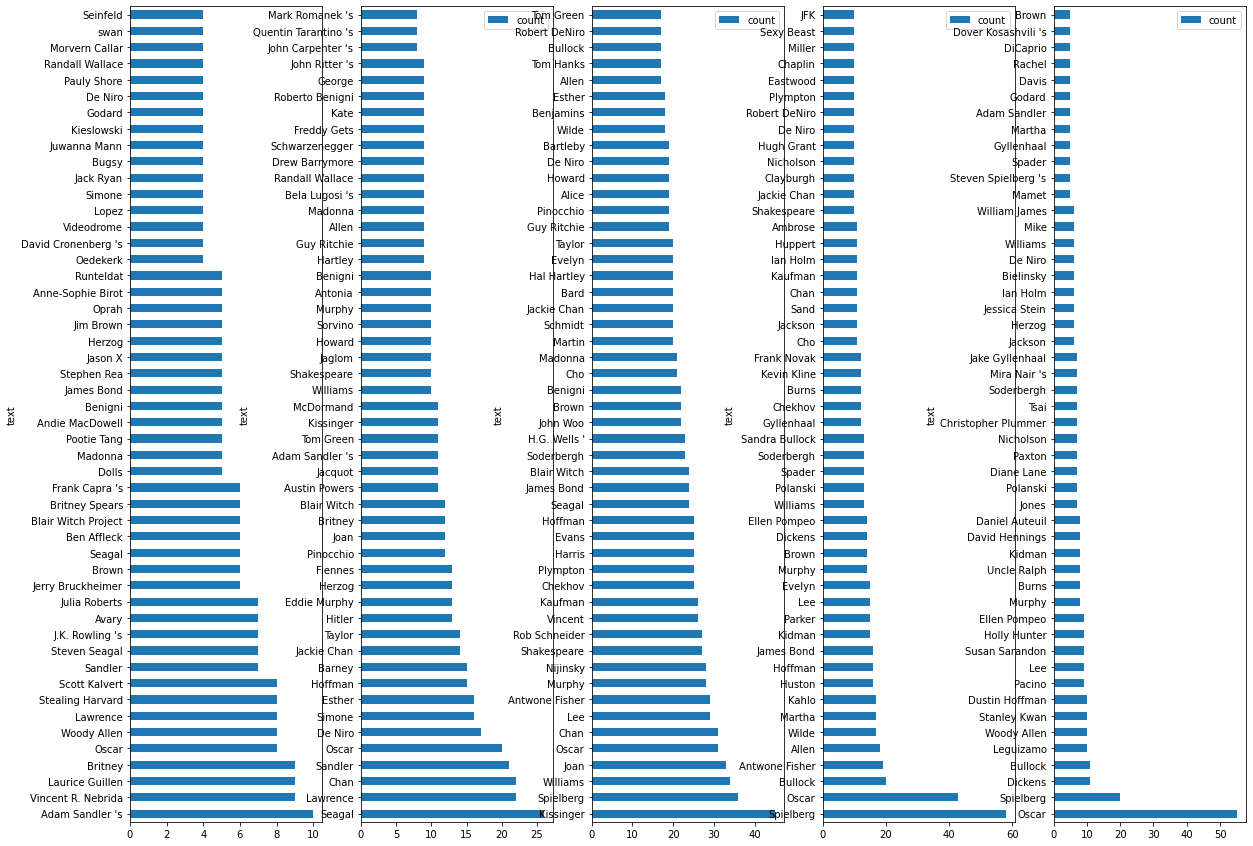

In [32]:

fig, (ax, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5)


df_person_0.plot(kind='barh', x='text', y='count', figsize=(20,15),  legend=False, ax=ax)
df_person_1.plot(kind='barh', x='text', y='count',ax=ax2)
df_person_2.plot(kind='barh', x='text', y='count',ax=ax3)
df_person_3.plot(kind='barh', x='text', y='count',ax=ax4)
df_person_4.plot(kind='barh', x='text', y='count',ax=ax5)
plt.show()
fig.savefig('Persons.png')

In [33]:
verb_counts_0 = Counter(verb_df['verb'][verb_df['Sentiment'] == 0]).most_common(50)
verb_counts_1 = Counter(verb_df['verb'][verb_df['Sentiment'] == 1]).most_common(50)
verb_counts_2 = Counter(verb_df['verb'][verb_df['Sentiment'] == 2]).most_common(50)
verb_counts_3 = Counter(verb_df['verb'][verb_df['Sentiment'] == 3]).most_common(50)
verb_counts_4 = Counter(verb_df['verb'][verb_df['Sentiment'] == 4]).most_common(50)

verb_df_0 = pd.DataFrame(verb_counts_0, columns =['text', 'count'])
verb_df_1 = pd.DataFrame(verb_counts_1, columns =['text', 'count'])
verb_df_2 = pd.DataFrame(verb_counts_2, columns =['text', 'count'])
verb_df_3 = pd.DataFrame(verb_counts_3, columns =['text', 'count'])
verb_df_4 = pd.DataFrame(verb_counts_4, columns =['text', 'count'])

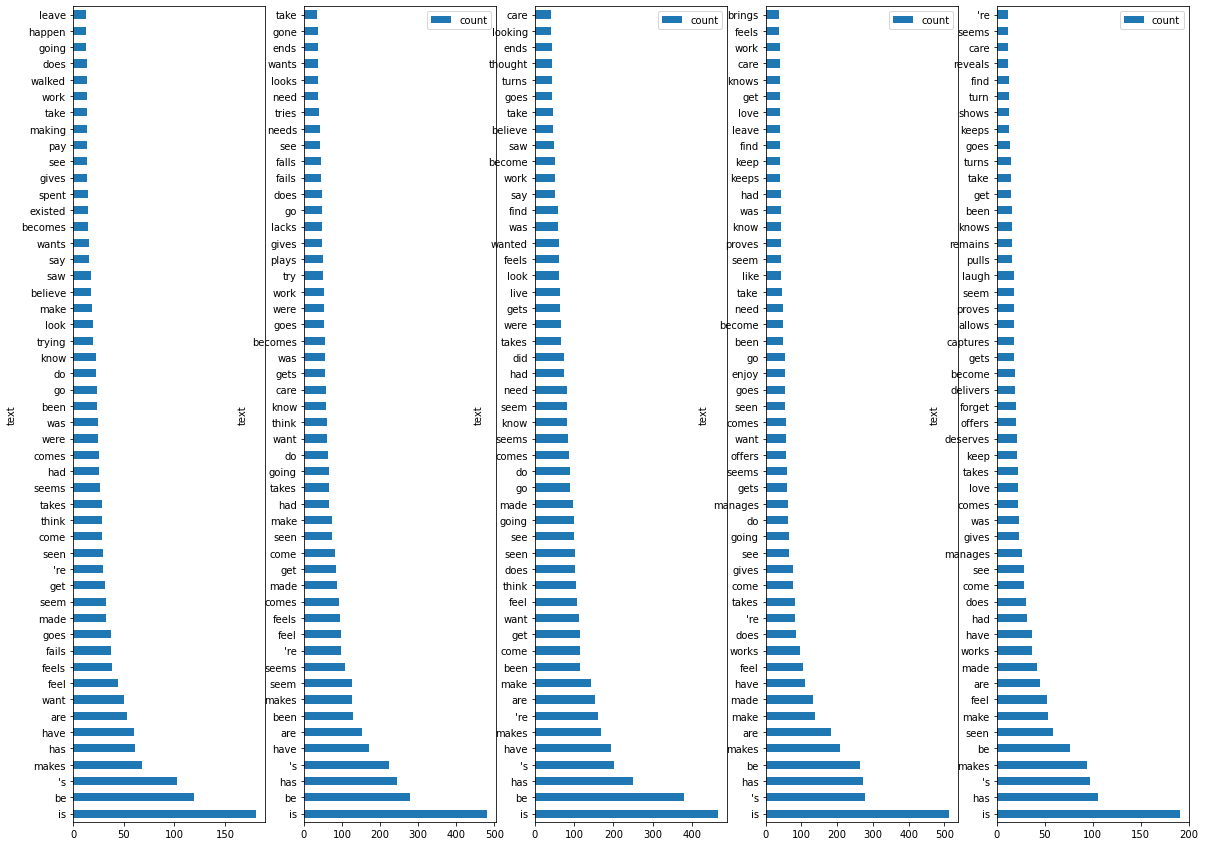

In [34]:
fig, (ax, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5)


verb_df_0.plot(kind='barh', x='text', y='count', figsize=(20,15),  legend=False, ax=ax)
verb_df_1.plot(kind='barh', x='text', y='count',ax=ax2)
verb_df_2.plot(kind='barh', x='text', y='count',ax=ax3)
verb_df_3.plot(kind='barh', x='text', y='count',ax=ax4)
verb_df_4.plot(kind='barh', x='text', y='count',ax=ax5)
plt.show()
fig.savefig('Verbs.png')

In [36]:
adj_counts_0 = Counter(adj_df['adj'][adj_df['Sentiment'] == 0]).most_common(50)
adj_counts_1 = Counter(adj_df['adj'][adj_df['Sentiment'] == 1]).most_common(50)
adj_counts_2 = Counter(adj_df['adj'][adj_df['Sentiment'] == 2]).most_common(50)
adj_counts_3 = Counter(adj_df['adj'][adj_df['Sentiment'] == 3]).most_common(50)
adj_counts_4 = Counter(adj_df['adj'][adj_df['Sentiment'] == 4]).most_common(50)

adj_df_0 = pd.DataFrame(adj_counts_0, columns =['text', 'count'])
adj_df_1 = pd.DataFrame(adj_counts_1, columns =['text', 'count'])
adj_df_2 = pd.DataFrame(adj_counts_2, columns =['text', 'count'])
adj_df_3 = pd.DataFrame(adj_counts_3, columns =['text', 'count'])
adj_df_4 = pd.DataFrame(adj_counts_4, columns =['text', 'count'])

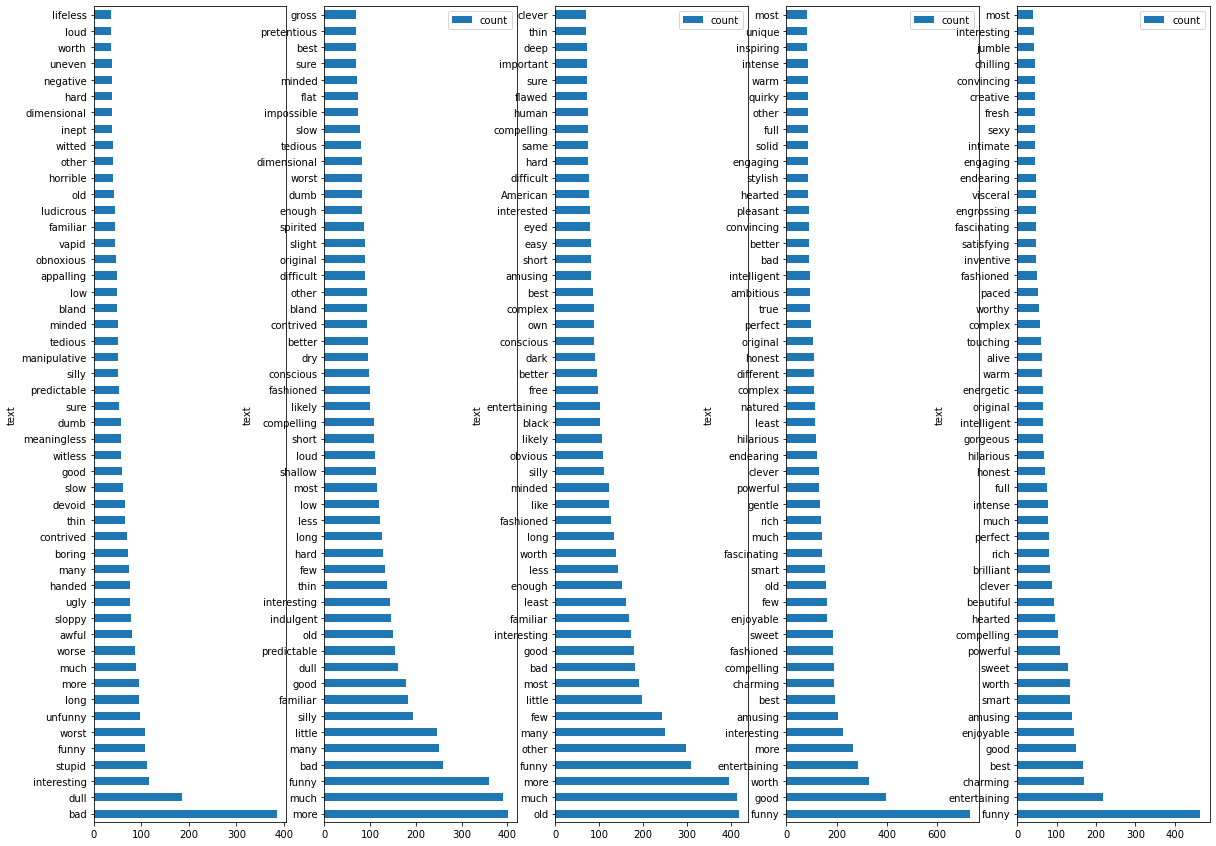

In [37]:
fig, (ax, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5)


adj_df_0.plot(kind='barh', x='text', y='count', figsize=(20,15),  legend=False, ax=ax)
adj_df_1.plot(kind='barh', x='text', y='count',ax=ax2)
adj_df_2.plot(kind='barh', x='text', y='count',ax=ax3)
adj_df_3.plot(kind='barh', x='text', y='count',ax=ax4)
adj_df_4.plot(kind='barh', x='text', y='count',ax=ax5)
plt.show()
fig.savefig('Adjectives.png')

In [39]:
gpe_counts_0 = Counter(gpe_df['GPE'][gpe_df['Sentiment'] == 0]).most_common(50)
gpe_counts_1 = Counter(gpe_df['GPE'][gpe_df['Sentiment'] == 1]).most_common(50)
gpe_counts_2 = Counter(gpe_df['GPE'][gpe_df['Sentiment'] == 2]).most_common(50)
gpe_counts_3 = Counter(gpe_df['GPE'][gpe_df['Sentiment'] == 3]).most_common(50)
gpe_counts_4 = Counter(gpe_df['GPE'][gpe_df['Sentiment'] == 4]).most_common(50)
df_gpe_0 = pd.DataFrame(gpe_counts_0, columns =['text', 'count'])
df_gpe_1 = pd.DataFrame(gpe_counts_1, columns =['text', 'count'])
df_gpe_2 = pd.DataFrame(gpe_counts_2, columns =['text', 'count'])
df_gpe_3 = pd.DataFrame(gpe_counts_3, columns =['text', 'count'])
df_gpe_4 = pd.DataFrame(gpe_counts_4, columns =['text', 'count'])

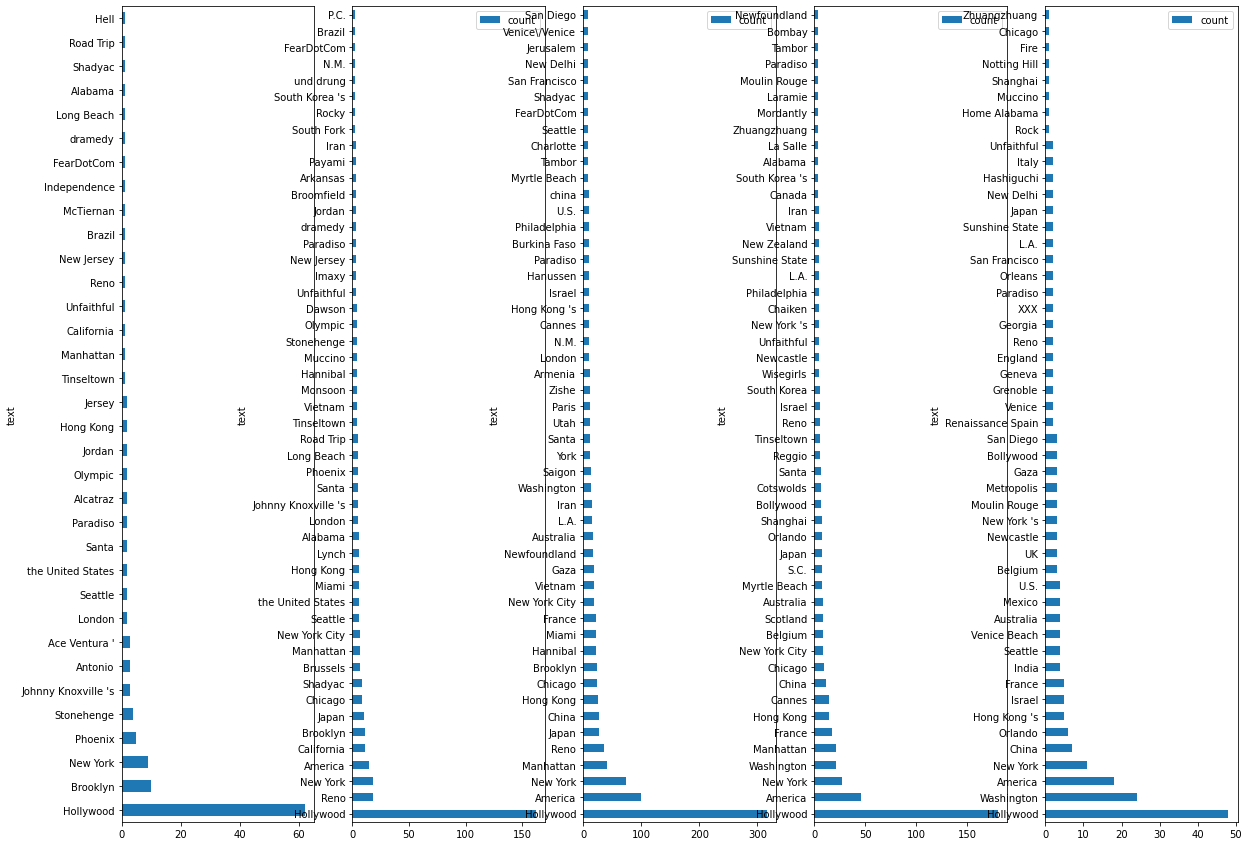

In [40]:
fig, (ax, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5)


df_gpe_0.plot(kind='barh', x='text', y='count', figsize=(20,15),  legend=False, ax=ax)
df_gpe_1.plot(kind='barh', x='text', y='count',ax=ax2)
df_gpe_2.plot(kind='barh', x='text', y='count',ax=ax3)
df_gpe_3.plot(kind='barh', x='text', y='count',ax=ax4)
df_gpe_4.plot(kind='barh', x='text', y='count',ax=ax5)
plt.show()
fig.savefig('GPE.png')

In [41]:
org_counts_0 = Counter(org_df['ORG'][org_df['Sentiment'] == 0]).most_common(50)
org_counts_1 = Counter(org_df['ORG'][org_df['Sentiment'] == 1]).most_common(50)
org_counts_2 = Counter(org_df['ORG'][org_df['Sentiment'] == 2]).most_common(50)
org_counts_3 = Counter(org_df['ORG'][org_df['Sentiment'] == 3]).most_common(50)
org_counts_4 = Counter(org_df['ORG'][org_df['Sentiment'] == 4]).most_common(50)
df_org_0 = pd.DataFrame(org_counts_0, columns =['text', 'count'])
df_org_1 = pd.DataFrame(org_counts_1, columns =['text', 'count'])
df_org_2 = pd.DataFrame(org_counts_2, columns =['text', 'count'])
df_org_3 = pd.DataFrame(org_counts_3, columns =['text', 'count'])
df_org_4 = pd.DataFrame(org_counts_4, columns =['text', 'count'])

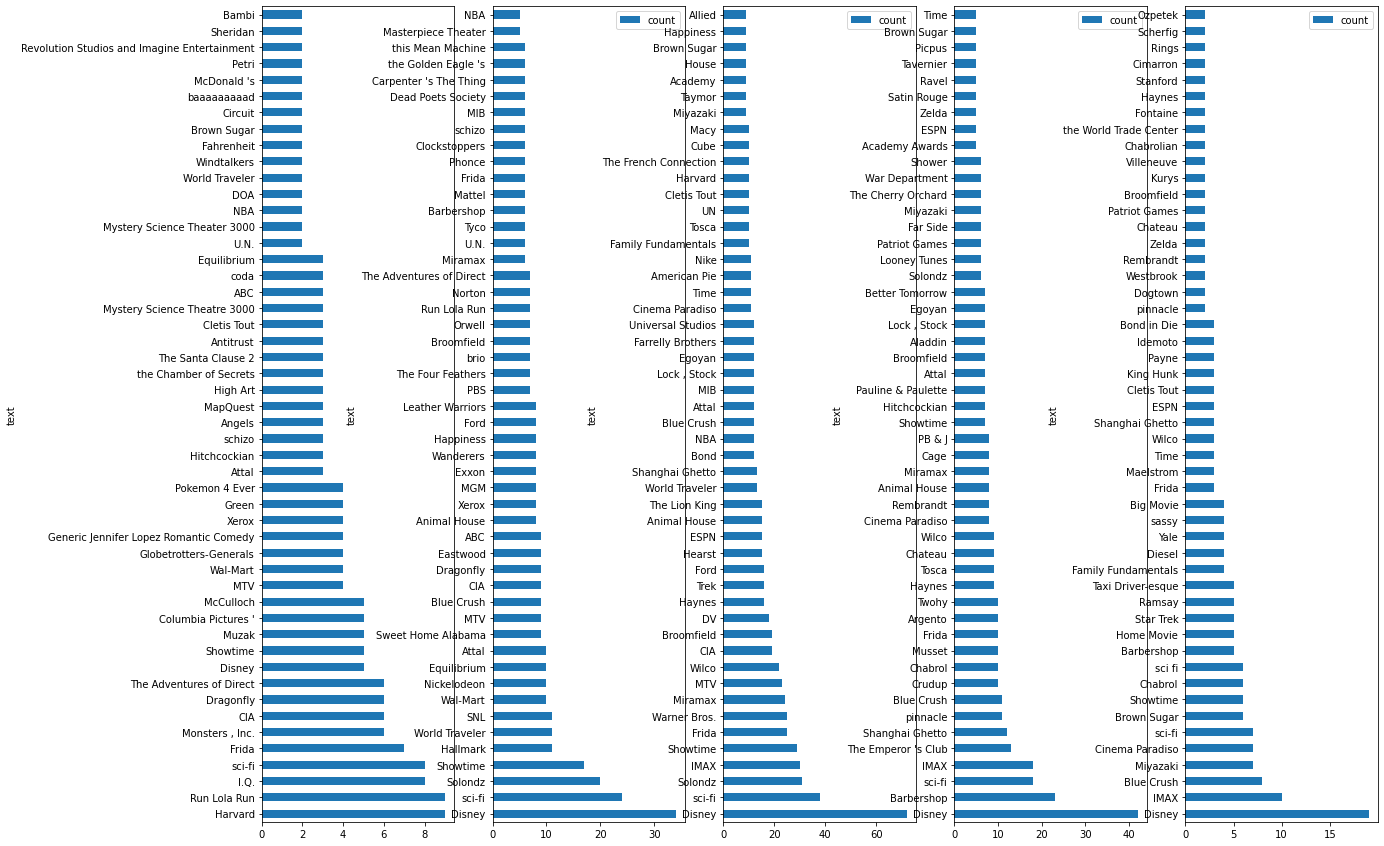

In [42]:
fig, (ax, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5)


df_org_0.plot(kind='barh', x='text', y='count', figsize=(20,15),  legend=False, ax=ax)
df_org_1.plot(kind='barh', x='text', y='count',ax=ax2)
df_org_2.plot(kind='barh', x='text', y='count',ax=ax3)
df_org_3.plot(kind='barh', x='text', y='count',ax=ax4)
df_org_4.plot(kind='barh', x='text', y='count',ax=ax5)
plt.show()
fig.savefig('ORG.png')

In [43]:
norp_counts_0 = Counter(norp_df['NORP'][norp_df['Sentiment'] == 0]).most_common(50)
norp_counts_1 = Counter(norp_df['NORP'][norp_df['Sentiment'] == 1]).most_common(50)
norp_counts_2 = Counter(norp_df['NORP'][norp_df['Sentiment'] == 2]).most_common(50)
norp_counts_3 = Counter(norp_df['NORP'][norp_df['Sentiment'] == 3]).most_common(50)
norp_counts_4 = Counter(norp_df['NORP'][norp_df['Sentiment'] == 4]).most_common(50)
df_norp_0 = pd.DataFrame(norp_counts_0, columns =['text', 'count'])
df_norp_1 = pd.DataFrame(norp_counts_1, columns =['text', 'count'])
df_norp_2 = pd.DataFrame(norp_counts_2, columns =['text', 'count'])
df_norp_3 = pd.DataFrame(norp_counts_3, columns =['text', 'count'])
df_norp_4 = pd.DataFrame(norp_counts_4, columns =['text', 'count'])

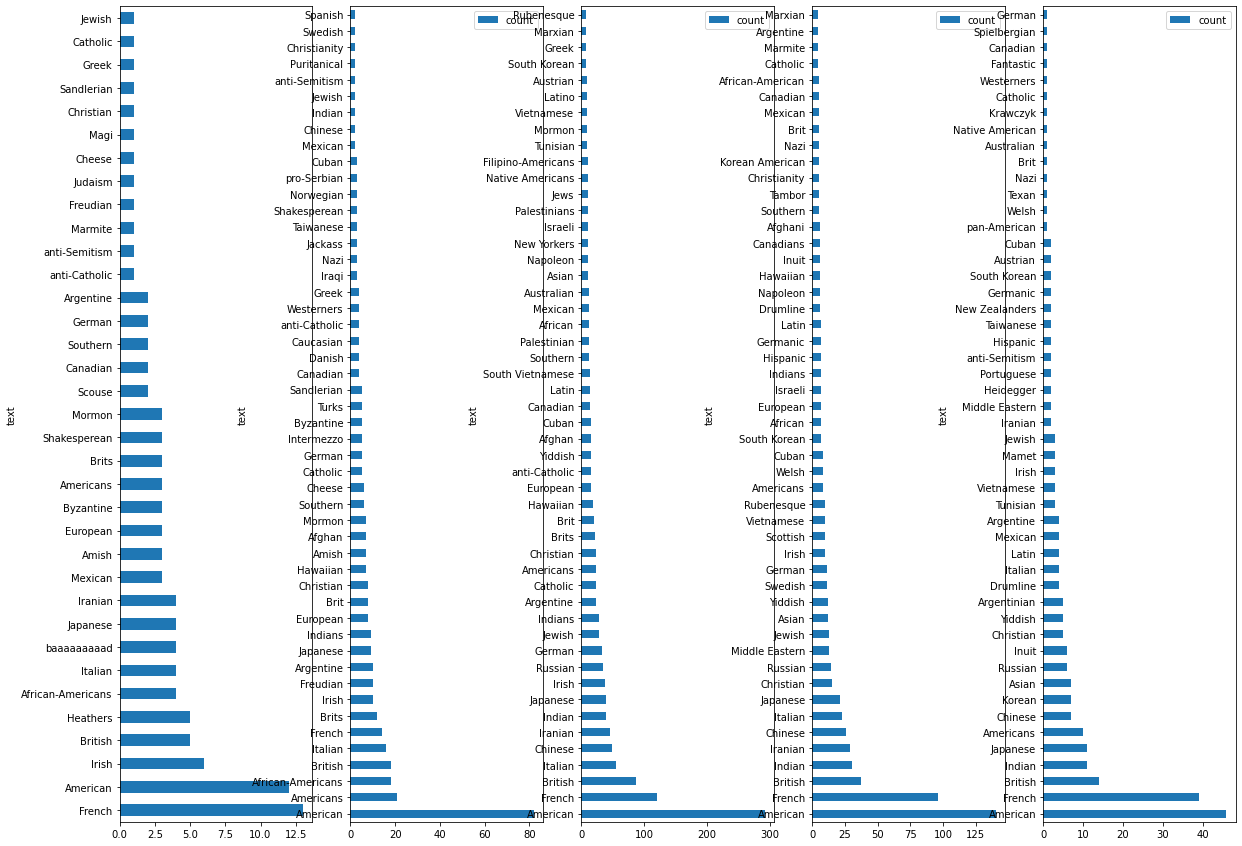

In [44]:
fig, (ax, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5)


df_norp_0.plot(kind='barh', x='text', y='count', figsize=(20,15),  legend=False, ax=ax)
df_norp_1.plot(kind='barh', x='text', y='count',ax=ax2)
df_norp_2.plot(kind='barh', x='text', y='count',ax=ax3)
df_norp_3.plot(kind='barh', x='text', y='count',ax=ax4)
df_norp_4.plot(kind='barh', x='text', y='count',ax=ax5)
plt.show()
fig.savefig('NORP.png')

**Observations:**

NOTE: there are many more Neutral reviews than other types so the absolute numbers need to take into account that

1) Adjectives used in the review seem to provide a good indication of sentiment. Positive reviews had a lot more instances of 'amusing', 'entertaining' 'enjoyable' etc.
    Negative reviews had a lot of instances of 'bad', 'stupid', 'dull' etc.

    Interestingly, I see a lot of instance of 'funny' and 'interesting' in the negative reviews. Not sure if there are qualifiers attached. (e.g. 'not funny') During modelling, I'm planning to use n-grams - either 2 or 3 grams to trap instance such as those. I should be able to catch number of instance of those which I do the vectorization
    Also, words like 'funny', 'interesting', 'bad' should provide a good indication of Sentiment. However, there are a lot of occurences of these words so that might not be picked up by something like TFIDF vectorization. Something to keep in mind during modeling.

2) Persons analysis is also interesting. I was wondering if the Actor, Producer or Director had any bearing on whether the review would be positive and I did see some of that e.g. I see Spielberg pretty high up in the good reviews. Adam Sandler is the most used person in the bad reviews. (no offense to the actor - I personally liked Waterboy). I am considering masking all Person names to prevent person names skewing the model. (I assume Spielberg can make bad movies and Sandler can star in good ones.) The absolute number of occurrences  is low which might effect TFIDF vectorization if I choose to use it. (e.g. the model might skew occurences of 'Adam Sandler' to a Negative rating)

3) For the ORG analysis, similar to PERSONS, I was wondering if some movie studios got better reviews and I see a lot of instanced of Disney and IMAX. (interestingly 'sci-fi' and 'Run Lola Run' were labeled as ORGs which is an issue with Spacy). 'Harvard' tops the bad reviews.

4) The VERBS analysis was not helpful and I think most of the verbs will be filtered out when I filter out stopwords

5) The NORP analysis seems to show a equal spread of American, French and other nationalities across the types of reviews.

6) The same for GPE with a lot of mentions  of Hollywood which is expected.


OTHER THOUGHTS:
The data is not evenly spread out. There any many more instances of Neutral reviews which might skew the model. 

